<a href="https://colab.research.google.com/github/hunn99/PCVK_Ganjil_2024/blob/main/Hijaiyah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install gTTS imutils matplotlib

In [ ]:
import glob
import cv2
import numpy as np
import imutils
import os
import matplotlib.pyplot as plt
from gtts import gTTS
from IPython.display import Audio, display
from google.colab import files

In [ ]:
# Fungsi untuk menampilkan gambar
def display_image(title, img, cmap="gray"):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

In [ ]:
# Fungsi untuk memainkan suara
def play_sound(file_path):
    display(Audio(file_path, autoplay=True))

Saving alif_7.jpg to alif_7.jpg
Processing test image: alif_7.jpg


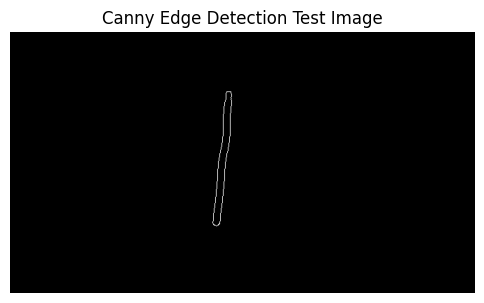

Huruf hijaiyah 'alif' terdeteksi!


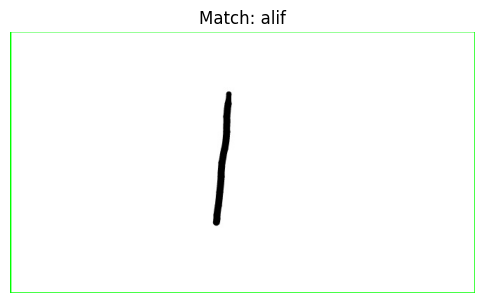

In [ ]:
# Fungsi untuk memuat dataset huruf hijaiyah
def load_dataset(dataset_path):
    dataset_data = []
    dataset_files = glob.glob(os.path.join(dataset_path, '*.jpg'))

    for file in dataset_files:
        img = cv2.imread(file)
        if img is None:
            print(f"Failed to load dataset image: {file}")
            continue

        # Resize dan preprocessing gambar
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_canny = cv2.Canny(img_gray, 50, 200)
        letter_name = os.path.basename(file).replace('.jpg', '')  # Ambil nama file tanpa ekstensi
        dataset_data.append({"image": img_canny, "name": letter_name})
    # print(f"{len(dataset_data)} huruf hijaiyah berhasil dimuat.")
    return dataset_data

# Fungsi utama untuk mencocokkan gambar uji dengan dataset
def upload_and_match_hijaiyah():
    # Lokasi dataset dan audio huruf hijaiyah
    dataset_path = '/content/drive/MyDrive/HurufHijaiyah'
    audio_path = '/content/drive/MyDrive/HurufHijaiyah/audio'

    # Load dataset huruf hijaiyah
    dataset_data = load_dataset(dataset_path)

    # Upload file uji
    uploaded = files.upload()

    # Proses file uji
    for file_name in uploaded.keys():
        test_image = cv2.imread(file_name)
        if test_image is None:
            print(f"Failed to load test image: {file_name}")
            continue

        print(f"Processing test image: {file_name}")
        test_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
        test_canny = cv2.Canny(test_gray, 50, 200)
        display_image("Canny Edge Detection Test Image", test_canny, cmap="gray")

        found_match = False
        for data in dataset_data:
            # Resize template image to match the test image size
            template_resized = cv2.resize(data['image'], (test_canny.shape[1], test_canny.shape[0]))

            # Template matching using the resized template
            result = cv2.matchTemplate(test_canny, template_resized, cv2.TM_CCOEFF_NORMED)
            (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

            if maxVal >= 0.4:  # Threshold kecocokan
                huruf = data['name'].split('_')[0]
                print(f"Huruf hijaiyah '{huruf}' terdeteksi!")

                # Tampilkan rectangle pada hasil
                (h, w) = template_resized.shape[:2]  # Use the resized template's shape
                top_left = maxLoc
                bottom_right = (top_left[0] + w, top_left[1] + h)
                cv2.rectangle(test_image, top_left, bottom_right, (0, 255, 0), 2)
                display_image(f"Match: {huruf}", test_image)

                # Putar audio jika ada
                audio_file = os.path.join(audio_path, f"{huruf}.mp3")
                if os.path.exists(audio_file):
                    play_sound(audio_file)
                else:
                    print(f"Audio untuk huruf '{huruf}' tidak ditemukan.")

                found_match = True
                break  # Hentikan jika sudah ada kecocokan

        if not found_match:
            print("Tidak ada huruf hijaiyah yang sesuai dengan gambar ini.")

if __name__ == "__main__":
    upload_and_match_hijaiyah()